In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\bisha\Downloads\archive (3)\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Analysis on data

In [6]:
new_df=df.copy()

In [7]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
labels=['0-20','21-40','41-60','above-60']
bins=[0,20,40,60,100]
new_df['age_label']=pd.cut(new_df.age,bins,labels=labels,include_lowest=True)

In [9]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges,age_label
0,19,female,27.900,0,yes,southwest,16884.92400,0-20
1,18,male,33.770,1,no,southeast,1725.55230,0-20
2,28,male,33.000,3,no,southeast,4449.46200,21-40
3,33,male,22.705,0,no,northwest,21984.47061,21-40
4,32,male,28.880,0,no,northwest,3866.85520,21-40


In [10]:
new_df.drop(columns='age',axis=1,inplace=True)

In [11]:
new_df.head()

,sex,bmi,children,smoker,region,charges,age_label
0,female,27.900,0,yes,southwest,16884.92400,0-20
1,male,33.770,1,no,southeast,1725.55230,0-20
2,male,33.000,3,no,southeast,4449.46200,21-40
3,male,22.705,0,no,northwest,21984.47061,21-40
4,male,28.880,0,no,northwest,3866.85520,21-40


In [12]:
new_df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [13]:
labels=['below-18.5','18.5-24.9','25.0-29.9','30.0-34.9','above 35']
bins=[0,18.5,24.9,29.9,34.9,60]
new_df['bmi_index']=pd.cut(new_df.bmi,bins,labels=labels,include_lowest=True)

In [14]:
new_df.head()

,sex,bmi,children,smoker,region,charges,age_label,bmi_index
0,female,27.900,0,yes,southwest,16884.92400,0-20,25.0-29.9
1,male,33.770,1,no,southeast,1725.55230,0-20,30.0-34.9
2,male,33.000,3,no,southeast,4449.46200,21-40,30.0-34.9
3,male,22.705,0,no,northwest,21984.47061,21-40,18.5-24.9
4,male,28.880,0,no,northwest,3866.85520,21-40,25.0-29.9


In [15]:
new_df.drop(columns='bmi',axis=1,inplace=True)

In [16]:
new_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## graphical analysis

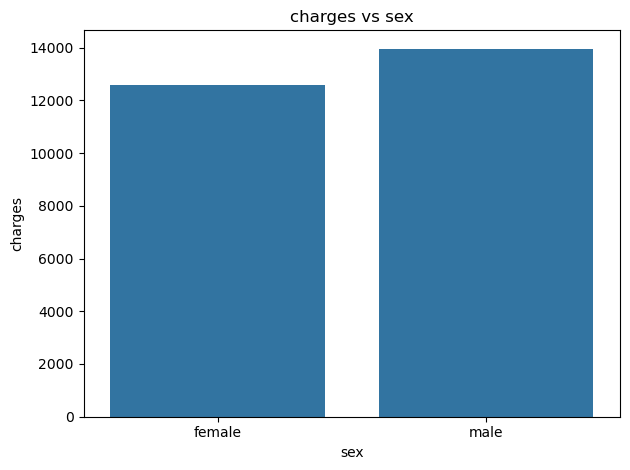

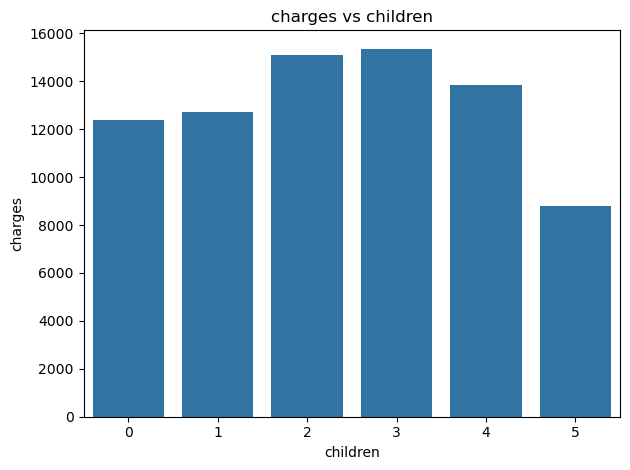

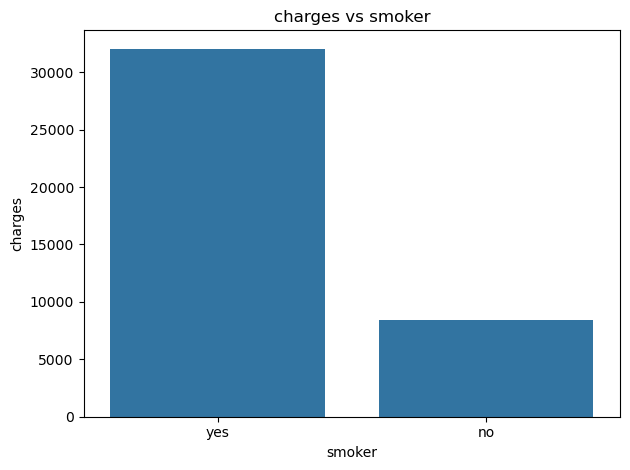

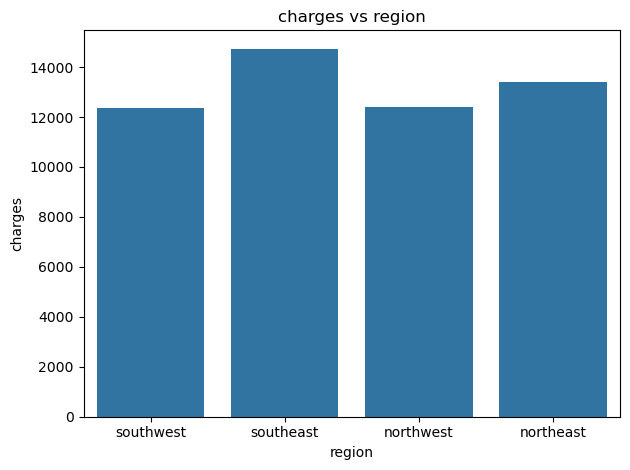

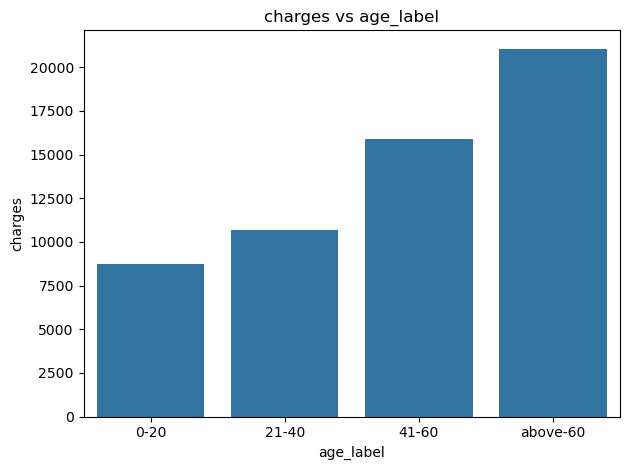

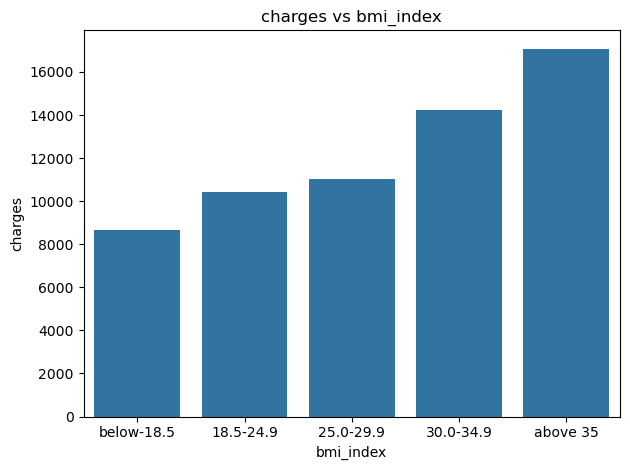

In [17]:
def relation(a,b):
    sns.barplot(data=new_df,x=a,y=b,errorbar=None)
    plt.title(f'{b} vs {a}')
    plt.tight_layout()
    plt.show()
for i in new_df.columns:
    if(i!='charges'):
       relation(i,'charges')

### Insights:-
- Male have more charges than female
- for the person having 3 child charge is high then for person having 2 child and very less charge for the person having 5 child
- south east region have high charges
- charges increases as age increases and as bmi increases

C:\Users\bisha\AppData\Local\Temp\ipykernel_14736\1532877823.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = smoker_df.groupby(['age_label', 'sex','bmi_index'])['charges'].mean().reset_index()


<Axes: xlabel='age_label', ylabel='charges'>

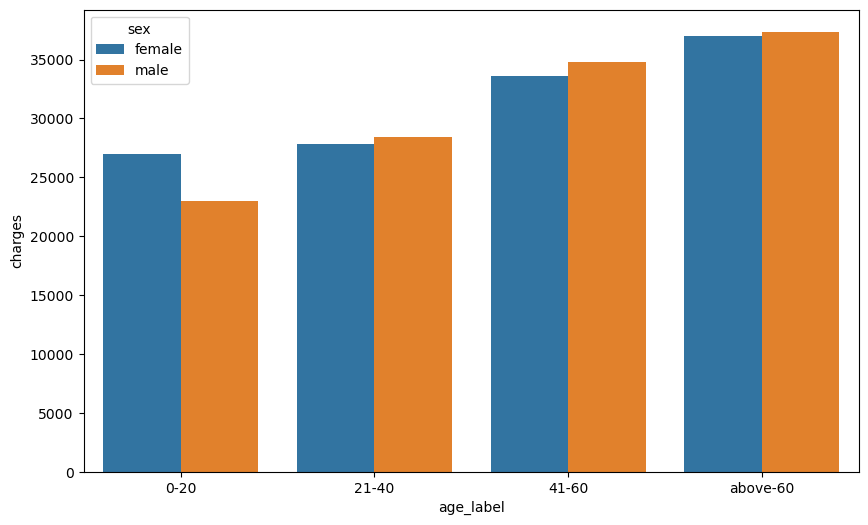

In [18]:
smoker_df = new_df[new_df['smoker'] == 'yes']

# Group by age_label and sex, and count the number of smokers
grouped = smoker_df.groupby(['age_label', 'sex','bmi_index'])['charges'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='age_label', y='charges', hue='sex',errorbar=None)

C:\Users\bisha\AppData\Local\Temp\ipykernel_14736\3848709501.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_smoker_grouped = non_smoker_df.groupby(['age_label', 'sex'])['charges'].mean().reset_index()


<Axes: xlabel='age_label', ylabel='charges'>

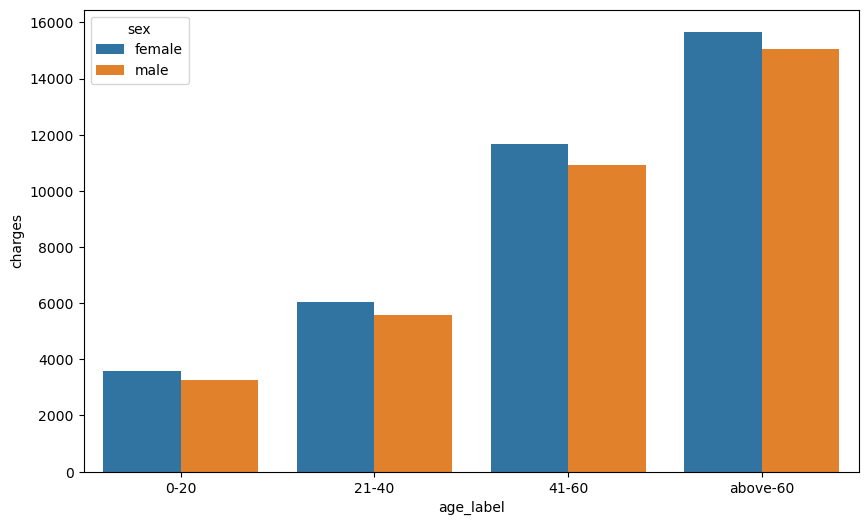

In [19]:
non_smoker_df = new_df[new_df['smoker'] == 'no']

# Group by age_label and sex, and count the number of smokers
non_smoker_grouped = non_smoker_df.groupby(['age_label', 'sex'])['charges'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=non_smoker_grouped, x='age_label', y='charges', hue='sex')

**insights**
- for smoker male charges is high but for age between 0-20 female smoker have high charges
- for non smoker female charges is high

<Axes: xlabel='bmi_index', ylabel='charges'>

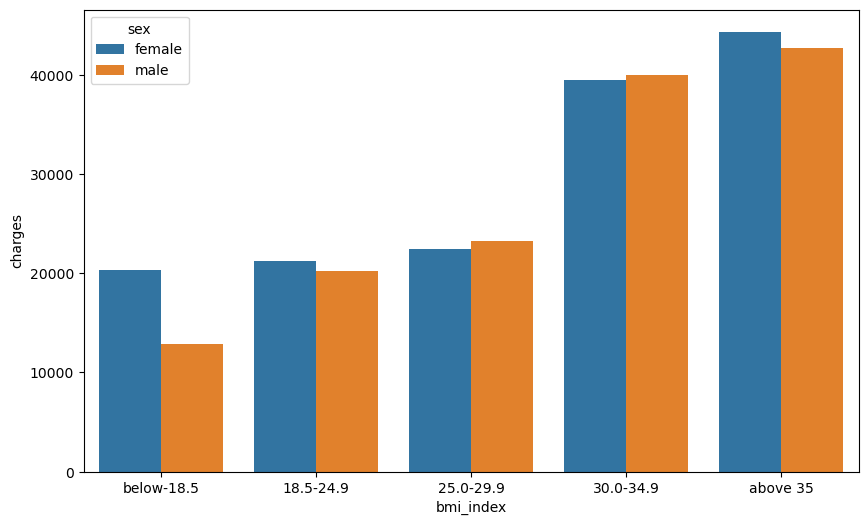

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='bmi_index', y='charges', hue='sex',errorbar=None)

**Insight**
- for normal and fit female smoker have high charges than male smoker
- for overweight,obsese,extremly obsese male smoker have high charges

<Axes: xlabel='region', ylabel='charges'>

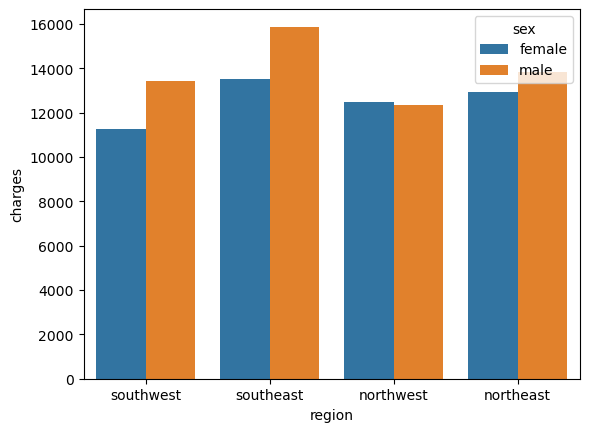

In [21]:
sns.barplot(data=new_df,x='region',y='charges',hue='sex',errorbar=None)

**insight**
- for southeast region charge is high then for northeast
- But in northwest charges for female is more than male

<Axes: xlabel='bmi_index', ylabel='charges'>

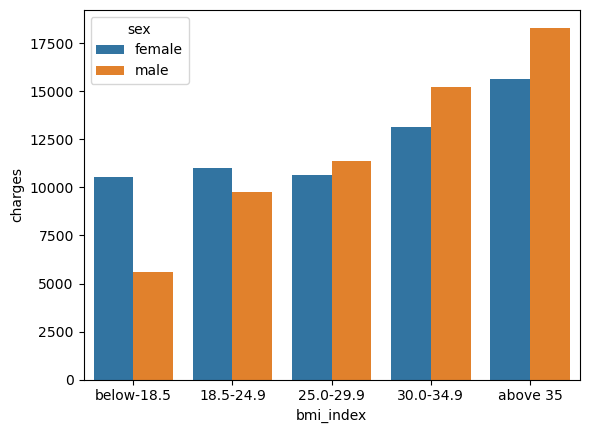

In [22]:
sns.barplot(data=new_df,x='bmi_index',y='charges',hue='sex',errorbar=None)

**Insight**
- For female who are underweight or normal the charges is high
- But for overweight,obsese man have high charges

Text(0.5, 1.0, 'children vs charges for different gender')

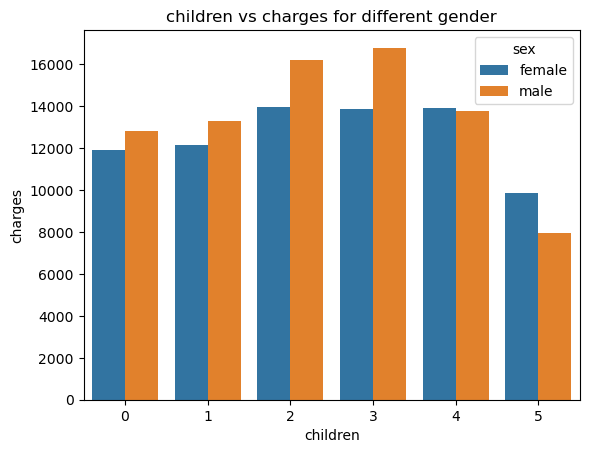

In [23]:
sns.barplot(data=new_df,x='children',y='charges',hue='sex',errorbar=None)
plt.title('children vs charges for different gender')

**Insight**
- Female having more than 3 child have to pay high charges as compared to male

### Feature engineering for model training

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
model_df=df.copy()

In [26]:
model_df['male']=pd.get_dummies(model_df['sex'],drop_first=True).astype(int)

In [27]:
model_df.drop('sex',axis=1,inplace=True)
model_df.head()

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [29]:
cateogory_col=['smoker','region']
ct=ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), cateogory_col)
    ],
    remainder='passthrough'
)
transformed=ct.fit_transform(model_df)
feature_names=ct.get_feature_names_out()
model_df=pd.DataFrame(transformed,columns=feature_names)
model_df.head()

,ohe__smoker_no,ohe__smoker_yes,ohe__region_northeast,ohe__region_northwest,ohe__region_southeast,ohe__region_southwest,remainder__age,remainder__bmi,remainder__children,remainder__charges,remainder__male
0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520,1.0


### Model Creation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [31]:
y=model_df.iloc[:,-2]

In [32]:
model_df.drop('remainder__charges',axis=1,inplace=True)

In [33]:
x=model_df.iloc[:,:]

In [34]:
x

,ohe__smoker_no,ohe__smoker_yes,ohe__region_northeast,ohe__region_northwest,ohe__region_southeast,ohe__region_southwest,remainder__age,remainder__bmi,remainder__children,remainder__male
0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1333,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,1.0
1334,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0,0.0
1335,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,0.0
1336,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,0.0


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [36]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [37]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=lr.predict(x_test)

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7398996390146233

In [40]:
from sklearn.linear_model import RidgeCV,LassoCV

In [41]:
lasso = LassoCV(cv=5).fit(x_train, y_train)
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0]).fit(x_train, y_train)

print("Best alpha for Lasso:", lasso.alpha_)
print("Best alpha for Ridge:", ridge.alpha_)
y_pred_lasso=lasso.predict(x_test)
y_pred_ridge=ridge.predict(x_test)

Best alpha for Lasso: 94.67901057002878
Best alpha for Ridge: 10.0


In [42]:
r2_score(y_test,y_pred_ridge)

0.7403419457816482

r2_score of both ridge and linear is same and equal to 0.74 means 75% of variance which is good score

In [43]:
r2_score(y_test,y_pred_lasso)

0.7414800827614989